In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Load the dataset
data = pd.read_csv(r"D:\results\results.csv")


In [5]:

# Prepare the data
X = data.drop(columns=['Roll No'])
y = X.pop('Chem 2111')  # Example target course, change as needed

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, roll_no_train, roll_no_test = train_test_split(
    X, y, data['Roll No'], test_size=0.2, random_state=42
)

# Convert y_test and y_pred to lists
y_test = y_test.tolist()

# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred = y_pred.tolist()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Example prediction for a new set of course GPAs
new_data = [[3.25, 3.50, 3.75, 4.00, 3.00, 2.50, 2.75, 2.00]]  # Example input
new_data_df = pd.DataFrame(new_data, columns=X_train.columns)  # Add feature names
predicted_gpa = model.predict(new_data_df)
print(f'Predicted GPA: {predicted_gpa[0]}')

Mean Squared Error: 0.12441666666666668
Predicted GPA: 3.075


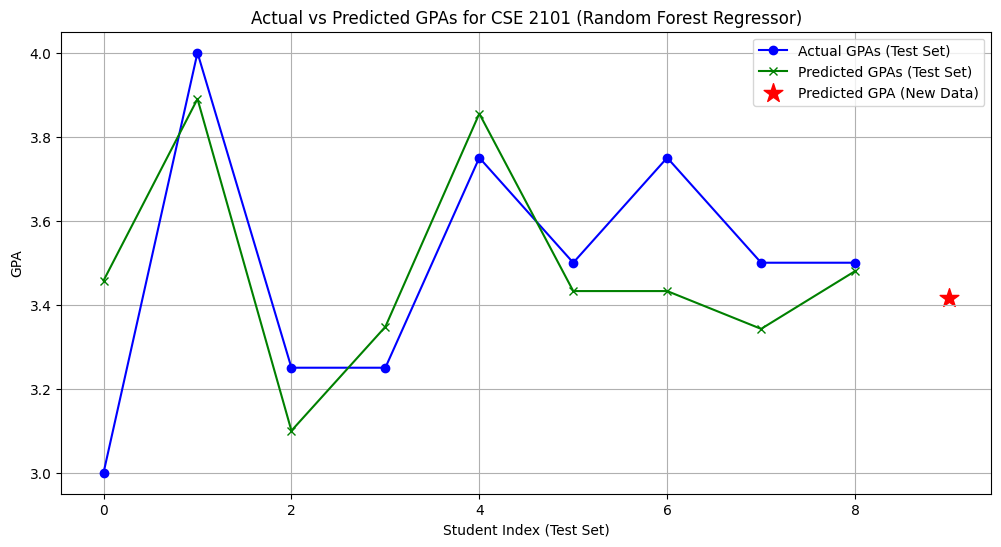

In [10]:
# --------------------------
# Matplotlib Graph
# --------------------------
plt.figure(figsize=(12, 6))

# Plot actual GPAs for the test set
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual GPAs (Test Set)', marker='o')

# Plot predicted GPAs for the test set
plt.plot(range(len(y_test)), y_pred, color='green', label='Predicted GPAs (Test Set)', marker='x')

# Highlight the predicted GPA for the new input data
plt.scatter(len(y_test), predicted_gpa, color='red', s=200, label='Predicted GPA (New Data)', marker='*')

# Add labels and title
plt.xlabel('Student Index (Test Set)')
plt.ylabel('GPA')
plt.title(f'Actual vs Predicted GPAs for {y.name} (Random Forest Regressor)')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
import turtle
import time


# Prepare the data
X = data.drop(columns=['Roll No'])
y = X.pop('CSE 2101')  # Example target course, change as needed

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, roll_no_train, roll_no_test = train_test_split(
    X, y, data['Roll No'], test_size=0.2, random_state=42
)

# Convert y_test and y_pred to lists
y_test = y_test.tolist()

# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred = y_pred.tolist()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Example prediction for a new set of course GPAs
new_data = [[3.25, 3.50, 3.75, 4.00, 3.00, 2.50, 2.75, 2.00]]  # Example input
new_data_df = pd.DataFrame(new_data, columns=X_train.columns)  # Add feature names
predicted_gpa = model.predict(new_data_df)
print(f'Predicted GPA: {predicted_gpa[0]}')

# --------------------------
# Turtle Animation
# --------------------------
# Set up Turtle for animation
screen = turtle.Screen()
screen.setup(width=800, height=600)
screen.bgcolor("white")
screen.title("Actual vs Predicted GPAs (Turtle Animation)")

# Create two Turtles for drawing
blue_pen = turtle.Turtle()  # For actual GPAs (blue line)
green_pen = turtle.Turtle()  # For predicted GPAs (green line)

# Customize the Turtles
blue_pen.color("blue")
blue_pen.speed(1)
blue_pen.penup()

green_pen.color("green")
green_pen.speed(1)
green_pen.penup()

# Function to scale GPAs for visualization
def scale_gpa(gpa_values, y_min=-200, y_max=200):
    gpa_min = min(gpa_values)
    gpa_max = max(gpa_values)
    if gpa_min == gpa_max:  # Handle case where all values are the same
        return [y_min + (gpa - gpa_min) * (y_max - y_min) / 1 for gpa in gpa_values]
    return [y_min + (gpa - gpa_min) * (y_max - y_min) / (gpa_max - gpa_min) for gpa in gpa_values]

# Scale the test set GPAs
y_test_scaled = scale_gpa(y_test)
y_pred_scaled = scale_gpa(y_pred)

# Generate x-values (student indices)
x_values = [-350 + i * 50 for i in range(len(y_test))]

# Animate both lines simultaneously
for i in range(len(x_values)):
    # Move blue pen to the next point (actual GPAs)
    blue_pen.goto(x_values[i], y_test_scaled[i])
    if i == 0:
        blue_pen.pendown()
    blue_pen.dot(10)
    blue_pen.write(f"{y_test[i]:.2f}", align="center", font=("Arial", 8, "normal"))

    # Move green pen to the next point (predicted GPAs)
    green_pen.goto(x_values[i], y_pred_scaled[i])
    if i == 0:
        green_pen.pendown()
    green_pen.dot(10)
    green_pen.write(f"{y_pred[i]:.2f}", align="center", font=("Arial", 8, "normal"))

    time.sleep(0.5)  # Add delay for animation

# Highlight the predicted GPA for the new input data
predicted_gpa_scaled = scale_gpa(y_test + [predicted_gpa[0]])[-1]  # Add predicted GPA to the list and scale
x_new = x_values[-1] + 50  # Position for new data
blue_pen.penup()
blue_pen.goto(x_new, predicted_gpa_scaled)
blue_pen.color("red")
blue_pen.pendown()
blue_pen.dot(15)
blue_pen.write(f"New: {predicted_gpa[0]:.2f}", align="center", font=("Arial", 8, "normal"))

# Hide the Turtles and display the result
blue_pen.hideturtle()
green_pen.hideturtle()
screen.mainloop()

Mean Squared Error: 0.04388958333333333
Predicted GPA: 3.415
